In [36]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train[0][1]

array([[ 16,  20,  20],
       [  0,   0,   0],
       [ 18,   8,   0],
       [ 51,  27,   8],
       [ 88,  51,  21],
       [120,  82,  43],
       [128,  89,  45],
       [127,  86,  44],
       [126,  87,  50],
       [116,  79,  44],
       [106,  70,  37],
       [101,  67,  35],
       [105,  70,  36],
       [113,  74,  35],
       [109,  70,  33],
       [112,  72,  37],
       [119,  79,  44],
       [109,  71,  33],
       [105,  69,  27],
       [125,  89,  46],
       [127,  92,  46],
       [122,  85,  39],
       [131,  89,  47],
       [124,  82,  41],
       [121,  79,  37],
       [131,  89,  48],
       [132,  91,  53],
       [133,  94,  58],
       [133,  96,  60],
       [123,  88,  55],
       [119,  83,  50],
       [122,  87,  57]], dtype=uint8)

In [8]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
def sample_image(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])

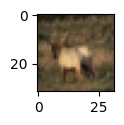

In [10]:
sample_image(3)

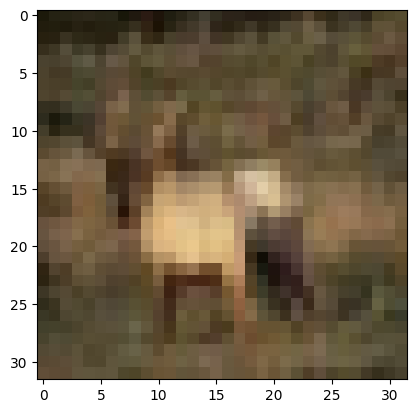

In [11]:
plt.imshow(X_train[3])

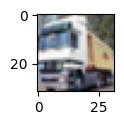

In [12]:
sample_image(1)

<Figure size 1000x500 with 0 Axes>

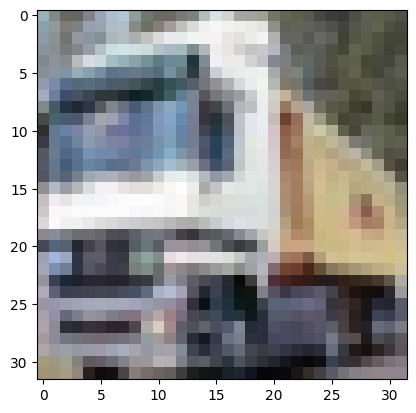

<Figure size 1000x500 with 0 Axes>

In [13]:
plt.imshow(X_train[1])
plt.figure(figsize=(10,5))

In [14]:
y_train[1]

array([9], dtype=uint8)

In [15]:
classes=["airplane"," automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
classes[y_train[3][0]]

'deer'

# Normalizing

In [18]:
X_train_scaled=X_train /255
X_test_scaled=X_test /255

In [19]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [20]:
# convert y_train and y_test data into categorical

In [21]:
y_train_categorical=keras.utils.to_categorical(
    y_train, num_classes=10,dtype='float64'
)
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float64'
)

In [22]:
y_train_categorical.shape

(50000, 10)

In [23]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [24]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

# Now model build

In [26]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
model.fit(X_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2261 - accuracy: 0.5674
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1985 - accuracy: 0.5789
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1683 - accuracy: 0.5923
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1405 - accuracy: 0.6028
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1146 - accuracy: 0.6111
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0859 - accuracy: 0.6207
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0617 - accuracy: 0.6298
Epoch 8/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0346 - accuracy: 0.6406
Epoch 9/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0065 - accuracy: 0.6503
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.981

# Now predic X_test data

In [32]:
classes[y_test[0][0]]

'cat'

In [37]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 1s 2ms/step


3

In [39]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 1s 2ms/step


'cat'

In [41]:
classes[y_test[1][0]]

'ship'

In [43]:
np.argmax(model.predict(X_test_scaled)[1])

313/313 [==============================] - 1s 2ms/step


8

In [44]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 [==============================] - 1s 3ms/step


'ship'

# our model predict cat